In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [165]:
# data = pd.read_csv("rutas/Cusco_Distance2Amenities.csv")
data = pd.read_csv("transporte_distritos/LimaCallao_Distance2Amenities.csv")

gs = gpd.GeoSeries.from_wkt(data['geometry'])
data = gpd.GeoDataFrame(data, geometry=gs)

In [166]:
data.head()

,osmid,geometry,NN,NN_dist,bank_distance,bank_dist,casino_distance,casino_dist,courthouse_distance,courthouse_dist,...,hospital_dist,marketplace_distance,marketplace_dist,police_distance,police_dist,school_distance,school_dist,university_distance,university_dist,distrito
0,273353447,POINT (-77.15019 -11.78919),273353447,0.000000,NaN,0.030901,NaN,0.106354,NaN,0.158543,...,0.026964,NaN,0.028778,0.0,0.004002,NaN,0.004404,NaN,0.171763,ANCON
1,273353463,POINT (-77.12801 -11.81576),273353463,0.000000,NaN,0.004544,NaN,0.071878,NaN,0.125400,...,0.015151,2520.343,0.002481,NaN,0.010175,2236.37,0.003867,NaN,0.137541,ANCON
2,273353749,POINT (-77.16339 -11.77636),273353749,0.000000,NaN,0.049117,NaN,0.124758,NaN,0.176760,...,0.009584,NaN,0.038835,NaN,0.005989,NaN,0.002118,NaN,0.189713,ANCON
3,273353751,POINT (-77.16407 -11.77609),5494667760,0.000572,NaN,0.049356,NaN,0.124991,NaN,0.176979,...,0.009432,NaN,0.039052,NaN,0.005863,NaN,0.001877,NaN,0.189955,ANCON
4,273353753,POINT (-77.16459 -11.77568),273353753,0.000065,NaN,0.050337,NaN,0.126014,NaN,0.178063,...,0.008341,NaN,0.039508,NaN,0.004825,NaN,0.001102,NaN,0.190877,ANCON


In [167]:
# amenities = ['bank','casino','courthouse','hospital','marketplace', 'police','school','university']
amenities = ['bank','courthouse','hospital','marketplace', 'police','school','university']

In [168]:
for amenity in amenities:
    cad = "data['{}'] = data['NN_dist'] + data['{}_distance'] + data['{}_dist']".format(amenity, amenity, amenity)
    print(cad)

data['bank'] = data['NN_dist'] + data['bank_distance'] + data['bank_dist']
data['courthouse'] = data['NN_dist'] + data['courthouse_distance'] + data['courthouse_dist']
data['hospital'] = data['NN_dist'] + data['hospital_distance'] + data['hospital_dist']
data['marketplace'] = data['NN_dist'] + data['marketplace_distance'] + data['marketplace_dist']
data['police'] = data['NN_dist'] + data['police_distance'] + data['police_dist']
data['school'] = data['NN_dist'] + data['school_distance'] + data['school_dist']
data['university'] = data['NN_dist'] + data['university_distance'] + data['university_dist']


In [169]:
%%time
data['bank'] = data['NN_dist'] + data['bank_distance'] + data['bank_dist']
# data['casino'] = data['NN_dist'] + data['casino_distance'] + data['casino_dist']
data['courthouse'] = data['NN_dist'] + data['courthouse_distance'] + data['courthouse_dist']
data['hospital'] = data['NN_dist'] + data['hospital_distance'] + data['hospital_dist']
data['marketplace'] = data['NN_dist'] + data['marketplace_distance'] + data['marketplace_dist']
data['police'] = data['NN_dist'] + data['police_distance'] + data['police_dist']
data['school'] = data['NN_dist'] + data['school_distance'] + data['school_dist']
data['university'] = data['NN_dist'] + data['university_distance'] + data['university_dist']

CPU times: user 12.7 ms, sys: 0 ns, total: 12.7 ms
Wall time: 12.4 ms


In [170]:
cols = ['distrito', 'osmid'] + amenities
# data[cols].to_csv("simbig22_distancias.csv", index=False)
cols

['distrito',
 'osmid',
 'bank',
 'courthouse',
 'hospital',
 'marketplace',
 'police',
 'school',
 'university']

In [176]:
def plotDistances(data, distrito, ax, legend=True):
    
    cond = data['distrito'] == distrito
    tmp = data[cond]
#     tmp.head()
    
#     fig, ax = plt.subplots(figsize=(7,5))

    columns = ['osmid', 
               'bank',
#                'casino',
               'courthouse',
               'hospital',
               'marketplace', 
               'police',
               'school',
               'university']

    toPlot = tmp[columns].set_index('osmid')/1000
    colors = ['green', 'red', 'purple', 'black', 'orange', 'cyan', 'blue', 'gray']
    colors_dist = {
        'bank':'orange',
        'casino': 'gray',
        'courthouse': 'pink',
        'hospital': 'red',
        'marketplace': 'purple',
        'police': 'green',
        'school': 'blue',
        'university': 'black'
    }

    i=0
    for col in columns[1:]:
        cond = toPlot[col] > 0
        label = col.capitalize().replace('_dist','')
        ax = sns.kdeplot(data=toPlot[cond], x=col, ax=ax, cumulative=True, 
                          label=label, alpha=0.5,
#                         color=colors[i]
                         color = colors_dist[col],
#                          log_scale=True,
#                          cut=0

                        )
        i=i+1

#     ax.set_xlabel("Distance (Km)", size=15)
#     ax.set_ylabel("Nodes", size=15)

    ax.set_xlabel(None)
    ax.set_ylabel(None)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

    if legend: 
        ax.legend(fontsize=12)
        
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_title(distrito.replace('_',' ').upper())
#     plt.show()
#     return fig, ax

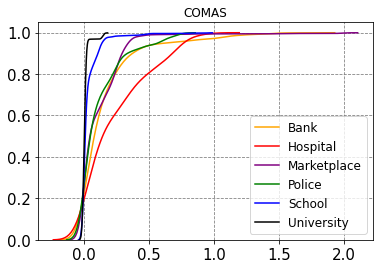

In [177]:
fig, ax = plt.subplots()
plotDistances(data, 'COMAS', ax)

In [173]:
distritos = list(data['distrito'].unique())
distritos

['ANCON',
 'ATE',
 'BARRANCO',
 'BELLAVISTA',
 'BREÑA',
 'CALLAO',
 'CARABAYLLO',
 'CARMEN_DE_LA_LEGUA_REYNOSO',
 'CHACLACAYO',
 'CHORRILLOS',
 'CIENEGUILLA',
 'COMAS',
 'EL_AGUSTINO',
 'INDEPENDENCIA',
 'JESUS_MARIA',
 'LA_MOLINA',
 'LA_PERLA',
 'LA_PUNTA',
 'LA_VICTORIA',
 'LIMA',
 'LINCE',
 'LOS_OLIVOS',
 'LURIGANCHO',
 'LURIN',
 'MAGDALENA_DEL_MAR',
 'MI_PERU',
 'MIRAFLORES',
 'PACHACAMAC',
 'PUCUSANA',
 'PUEBLO_LIBRE',
 'PUENTE_PIEDRA',
 'PUNTA_HERMOSA',
 'PUNTA_NEGRA',
 'RIMAC',
 'SAN_BARTOLO',
 'SAN_BORJA',
 'SAN_ISIDRO',
 'SAN_JUAN_DE_LURIGANCHO',
 'SAN_JUAN_DE_MIRAFLORES',
 'SAN_LUIS',
 'SAN_MARTIN_DE_PORRES',
 'SAN_MIGUEL',
 'SANTA_ANITA',
 'SANTA_MARIA_DEL_MAR',
 'SANTA_ROSA',
 'SANTIAGO_DE_SURCO',
 'SURQUILLO',
 'VENTANILLA',
 'VILLA_EL_SALVADOR',
 'VILLA_MARIA_DEL_TRIUNFO']

In [123]:
for a in amenities:
#     print(data[a].max())
    maxvalue = data[a].max()
    print(a, maxvalue)
    data[a].fillna(maxvalue, inplace=True)

bank 10001.208895098043
courthouse 12365.077366145873
hospital 11270.379095030225
marketplace 6745.524741654278
police 11053.737918988318
school 6168.2006842856445
university 11494.76504843963


In [174]:
# (data[amenities] < 0).sum()
len(distritos)

50

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py

CPU times: user 16.2 s, sys: 364 ms, total: 16.5 s
Wall time: 16.5 s


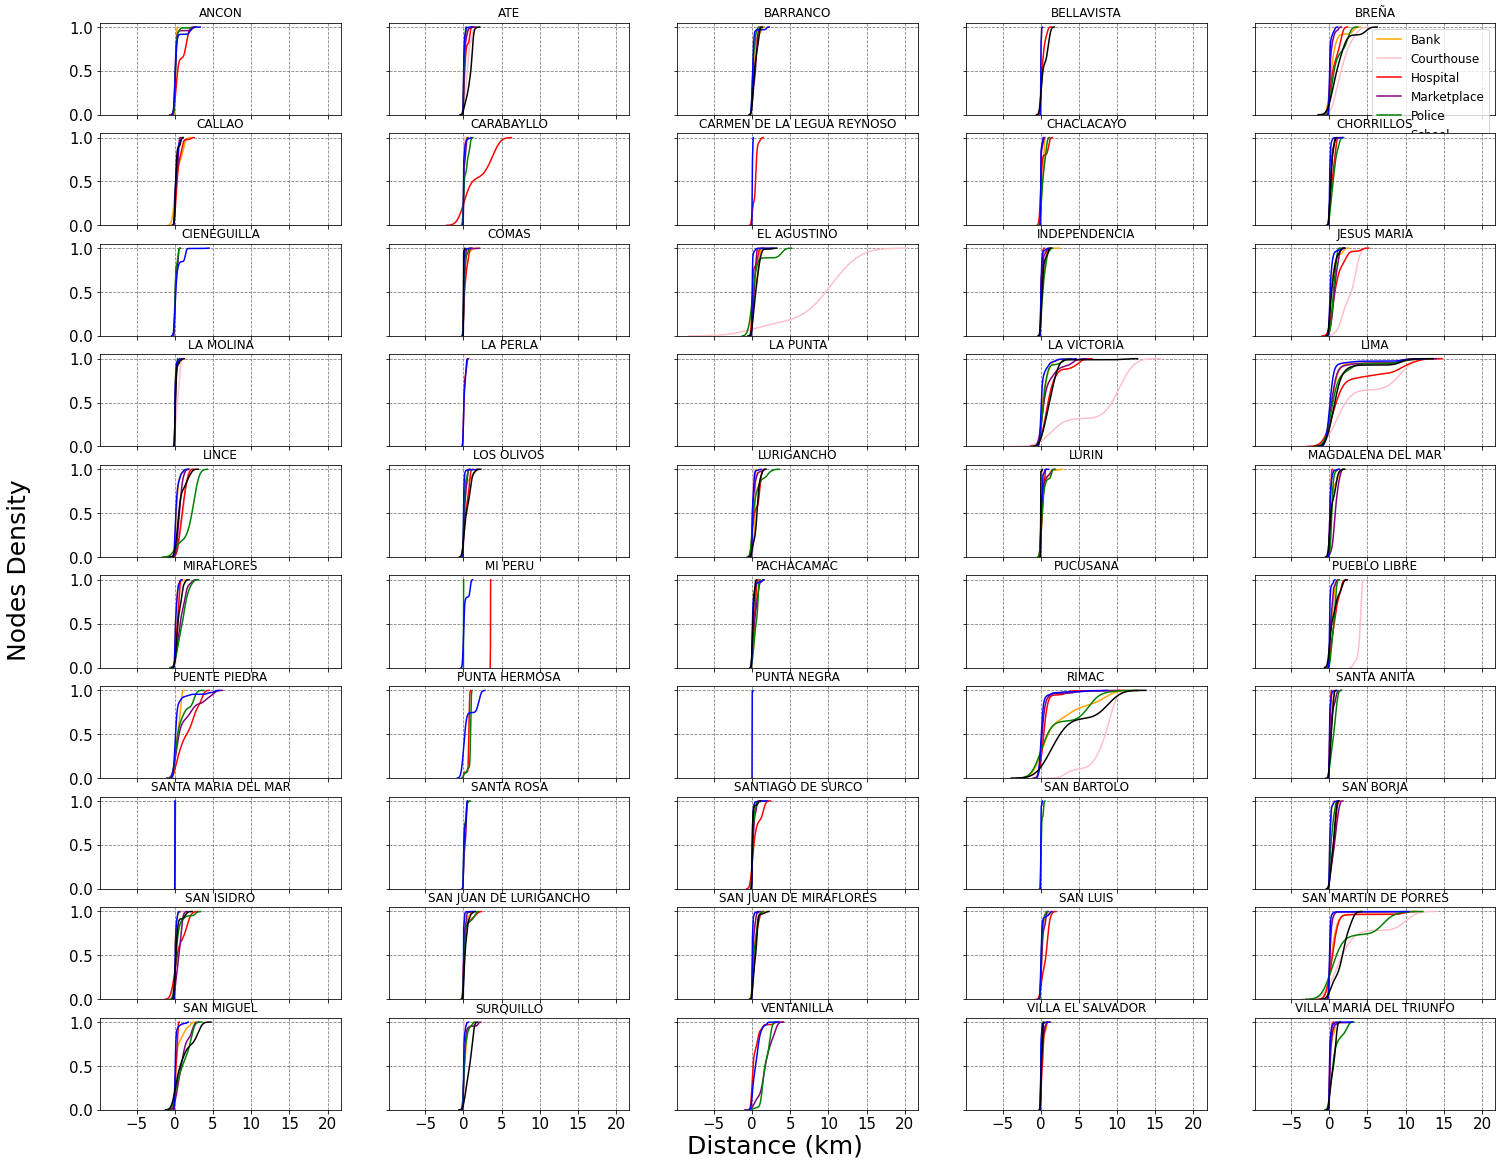

In [178]:
%%time

N,M = 10,5

fig, ax = plt.subplots(N, M, sharex=True, sharey=True, figsize=(25,20))


# list_districts = data.groupby('district')[['osmid']].count().sort_values('osmid', ascending=False).index
distritos = list(data['distrito'].unique())

_list = np.sort(distritos[:N*M])
matrix = np.array(_list).reshape(N,M)

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        val = matrix[i][j]
        if (i==0) & (j==4):
            plotDistances(data, val, ax[i][j])
        else:
            plotDistances(data, val, ax[i][j], False)

# Set common labels
fig.text(0.5, 0.1, 'Distance (km)', ha='center', va='center', fontsize=25)
fig.text(0.08, 0.5, 'Nodes Density', ha='center', va='center', rotation='vertical', fontsize=25)

plt.savefig("distancesLima.png", bbox_inches='tight', dpi=400)
# plt.savefig("distancesCusco.png", bbox_inches='tight', dpi=500)

<AxesSubplot:title={'center':'CCORCA'}>

# Cusco

In [64]:
datacusco = pd.read_csv("rutas/cusco_means_final.csv", 
                   dtype={'osmid':'string'}).set_index('distrito')
datacusco.columns = ['bank', 'courthouse', 'hospital', 'marketplace', 'police', 'school', 'university']
# datacusco.drop(['osmid', 'casino'], axis=1,inplace=True)
datacusco['mean'] = datacusco.mean(axis=1)
datacusco.head()

,bank,courthouse,hospital,marketplace,police,school,university,mean
distrito,,,,,,,,
WANCHAQ,1447.575817,2966.837119,1337.955883,1306.987792,1182.920595,226.204805,1344.420839,1401.843264
SAYLLA,7046.504675,9016.650675,9398.580675,759.344239,961.408589,513.095366,3970.234675,4523.688413
SANTIAGO,2299.777700,2437.442743,1900.574810,1323.971965,1967.714253,513.208113,2290.998949,1819.098362
SAN SEBASTIAN,2695.503379,3542.493804,2834.577142,3489.850076,3753.057049,1735.661693,3232.375522,3040.502666
SAN JERONIMO,1521.779245,2800.974155,2966.001130,2262.192983,1944.031129,490.107351,1635.192614,1945.754087
